## Introduction

In [1]:
# This is my attempt to write the EM algorithm from scratch for Gaussian Mixtures model.
# Again, EM algorithm is an iterative recipie required to find the maximum likelihood estimate in a problem where the standard MLE steps are intractable in closed form due to the induction of some latent (hidden) variables. In the case of Gaussian Mixtures models, for the case of >= 2 gaussians, we do not know which gaussian each data point belongs to, which are the inherent latent variables in this problem setting

# Agenda
# 1) Create data points using pre-declared gaussians (The aim will be to learn these gaussians from the data)
# 2) Initialize the means, standard-deviations and mixture proportions
#     - Create smarter estimates using k-means [To Do]
# 3) Iterate the E step and the M step to increase the log-likelihood with each step
# 4) Animate the process [To Do]

# Great tutorial on EM Algorithm
# https://stephens999.github.io/fiveMinuteStats/intro_to_mixture_models.html
# https://stephens999.github.io/fiveMinuteStats/intro_to_em.html

In [2]:
import numpy as np
import scipy.stats
import math
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# num of Gaussians
k = 2

## Create Input data from two gaussians which we will try to learn later

mean:5586.65108659
sd:9.34049012356
num_elms:18137
mean:8475.83415187
sd:10.5251620073
num_elms:22243


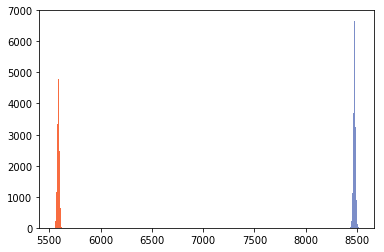

In [13]:
input_data = []

input_gaussians = []

for i in range(k):
    temp_gaussian = {}
    temp_gaussian['mean'] = 10000*np.random.random_sample()
    temp_gaussian['sd'] = 5+10*np.random.random_sample()
    temp_gaussian['dist'] = []
    temp_gaussian['num_elms'] = int(30000*np.random.random_sample())
    for count in range(temp_gaussian['num_elms']):
        temp_gaussian['dist'].append(np.random.normal(loc=temp_gaussian['mean'], scale=temp_gaussian['sd'], size=None))
    temp_gaussian['dist'] = np.array(temp_gaussian['dist'])
    input_gaussians.append(temp_gaussian)
    input_data += list(temp_gaussian['dist'])
    

import random
for gaussian in input_gaussians:
    print 'mean:' + str(gaussian['mean'])
    print 'sd:' + str(gaussian['sd'])
    print 'num_elms:' + str(gaussian['num_elms'])
    plt.hist(gaussian['dist'], color=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])))
# plt.hist(input_gaussians[1], color='green')

In [14]:
input_data = np.array(pd.Series(input_data).sample(len(input_data)))
input_data.shape

(40380,)

In [15]:
# The EM Algorithm

In [16]:
range_constant = input_data.mean()
sd_constant = input_data.std()

## Initialize the means and sds

In [17]:
mews = []
sd = []
for i in range(k):
    mews.append(range_constant*np.random.random_sample())
    sd.append(sd_constant*np.random.random_sample())
mews = np.array(mews)
sd = np.array(sd)
mix_weights = k*[1/float(k)]

## Run the E and M step iteratively for n runs

In [18]:
all_mews = {}
all_sd = {}
debugger = []
for iter_num in range(100):
    
    print mews
    
    # Posterior prob for each k and Xi
    posterior_prob_k_Xi = []

    # E-Step
    for i in range(k): 
        ratio_k_i = []
        for Xi in input_data:
            numer = mix_weights[i] * scipy.stats.norm(loc=mews[i], scale=sd[i]).pdf(Xi) 
            denom = 0.0
            for j in range(k):
                denom += mix_weights[j] * scipy.stats.norm(loc=mews[j], scale=sd[j]).pdf(Xi) 
            if denom == 0.0:
                ratio = 0.0
            else:
                ratio = numer / float(denom)
            ratio_k_i.append(ratio)
        posterior_prob_k_Xi.append(ratio_k_i)
    
    posterior_prob_k_Xi = np.array(posterior_prob_k_Xi)

    # M-step
    # New parameters
    for i in range(k):
        if i not in all_mews:
            all_mews[i] = []
        else:
            all_mews[i].append(mews[i])
            
        if i not in all_sd:
            all_sd[i] = []
        else:
            all_sd[i].append(sd[i])

        if float(sum(posterior_prob_k_Xi[i])) != 0.0:
            sd[i] = math.sqrt(np.matmul(np.square(input_data - mews[i]).reshape((1,input_data.shape[0])), posterior_prob_k_Xi[i].reshape((input_data.shape[0],1)))[0][0] / float(sum(posterior_prob_k_Xi[i])))

            mews[i] = np.matmul(input_data.reshape((1,input_data.shape[0])), posterior_prob_k_Xi[i].reshape((input_data.shape[0],1)))[0][0] / float(sum(posterior_prob_k_Xi[i]))
            
            mix_weights[i] = sum(posterior_prob_k_Xi[i]) / float(input_data.shape[0])

        else:
            print 'init parameters again because of non-convergence of EM step'
            sd[i] = sd_constant*np.random.random_sample()
            mews[i] = range_constant*np.random.random_sample()
            mix_weights[i] = 1/float(k)

            
        


[3254.92930798 1864.22189305]
[7178.11223819 5585.71600909]
[7178.11223276 6943.33515246]


KeyboardInterrupt: 

In [ ]:
# Learning mean with each iteration
for mean in all_mews:
    plt.plot(all_mews[mean])

In [ ]:
# Learning SD with each iteration
for sds in all_sd:
    plt.plot(all_sd[sds])

In [ ]:
for i in range(k):
    print 'Original Mean, SD: (' + str(input_gaussians[i]['mean']) + ', ' + str(input_gaussians[i]['sd']) + ')'

print ''

for i in range(k):
    print 'Calculated Mean, SD: (' + str(mews[i]) + ', ' + str(sd[i]) + ')'